# Preprocessing & Modeling Notebook

###  Notebook Contents:

1. Import the packages that I need.
2. Import the notebooks that I need (adulting_df and teenagers_df).
3. Merge adulting_df with teenagers_df to created merged_df.
4. Cleaning of merged_df.
    - Mapping
    - Dropping unnecessary columns.
5. Calculate baseline score of merged_df.
    - Teenagers 51%
    - Adulting 49%
6. Tokenize / Lemmatize / Stemming of data.
7. Export merged_df to datasets folder.

In [1]:
# Importing of packages that I need
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

C:\Users\nolan_fur2pfn\.conda\envs\dsi\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\nolan_fur2pfn\.conda\envs\dsi\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\nolan_fur2pfn\.conda\envs\dsi\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# Bringing in both dataframes, Adulting and Teenagers
adulting_df = pd.read_csv('./data/adulting_subreddit.csv')
teenagers_df = pd.read_csv('./data/teenagers_subreddit.csv')

In [3]:
# Merging of dataframes so that I can use them together for predictions
merged_df = pd.concat([teenagers_df, adulting_df])

In [4]:
# Specifiying what columns I want to use for my preprocessing
merged_df[['title', 'selftext', 'user_post', 'subreddit']]

,title,selftext,user_post,subreddit
0,They say that at least one person has a crush ...,But damn I wish whoever had a crush on me woul...,They say that at least one person has a crush ...,teenagers
1,i need to lose 80 pounds immediately,my ass is 220 pounds and 5’6”. im fucking 15. ...,i need to lose 80 pounds immediately my ass is...,teenagers
2,i wanna drink hydrochloric acid,​​​​​ ​​​​​​ ​​​​​​ ​​​​​​​​ ​​​​​​​​​​​​​​​​​...,i wanna drink hydrochloric acid ​​​​​ ​​​​​​ ​...,teenagers
3,Ask me weirdly personal questions part 3 (seri...,"Idk why I'm doing this, I guess it's fun and l...",Ask me weirdly personal questions part 3 (seri...,teenagers
4,"Dear teen boys,",If a girl you have a crush on says she's not i...,"Dear teen boys, If a girl you have a crush on ...",teenagers
...,...,...,...,...
4683,Has anyone tried HelloFresh or any other food ...,I'm starting to get into cooking but I'm kind ...,Has anyone tried HelloFresh or any other food ...,Adulting
4684,How much in savings should you have,NaN,How much in savings should you have,Adulting
4685,Move and find a job or find a job and move first?,"Hi all, so I've been looking to move recently...",Move and find a job or find a job and move fir...,Adulting
4686,How to convince South Asian parents that I nee...,"Hey guys,\n\nSo i’m a 26 year old (M) with a s...",How to convince South Asian parents that I nee...,Adulting


In [5]:
# Dropping null values
merged_df.dropna(inplace=True)
# Mapping subreddits, Adulting as 1, Teenagers as 0
merged_df["subreddit"] = merged_df["subreddit"].map({"Adulting":1, "teenagers":0})
# Resetting my index so that my rows are numbered correctly
merged_df.reset_index(inplace=True)
# Setting my merged_df as the columns I intend to use
merged_df = merged_df[['title', 'selftext', 'user_post', 'subreddit']]

In [6]:
# Visualizing my merged_dataframe
merged_df

,title,selftext,user_post,subreddit
0,They say that at least one person has a crush ...,But damn I wish whoever had a crush on me woul...,They say that at least one person has a crush ...,0
1,i need to lose 80 pounds immediately,my ass is 220 pounds and 5’6”. im fucking 15. ...,i need to lose 80 pounds immediately my ass is...,0
2,i wanna drink hydrochloric acid,​​​​​ ​​​​​​ ​​​​​​ ​​​​​​​​ ​​​​​​​​​​​​​​​​​...,i wanna drink hydrochloric acid ​​​​​ ​​​​​​ ​...,0
3,Ask me weirdly personal questions part 3 (seri...,"Idk why I'm doing this, I guess it's fun and l...",Ask me weirdly personal questions part 3 (seri...,0
4,"Dear teen boys,",If a girl you have a crush on says she's not i...,"Dear teen boys, If a girl you have a crush on ...",0
...,...,...,...,...
7476,How to get a car without any help from family,"I live in California, and have realized all th...",How to get a car without any help from family ...,1
7477,Has anyone tried HelloFresh or any other food ...,I'm starting to get into cooking but I'm kind ...,Has anyone tried HelloFresh or any other food ...,1
7478,Move and find a job or find a job and move first?,"Hi all, so I've been looking to move recently...",Move and find a job or find a job and move fir...,1
7479,How to convince South Asian parents that I nee...,"Hey guys,\n\nSo i’m a 26 year old (M) with a s...",How to convince South Asian parents that I nee...,1


In [7]:
# Seeing baseline scores
merged_df['subreddit'].value_counts()

0    3842
1    3639
Name: subreddit, dtype: int64

## CVec Modeling

In [8]:
# Setting X as my user_post column
X = merged_df['user_post']
# Instantiate my countvectorizer
cvec = CountVectorizer()
# Fitting my X
cvec.fit(X)
# Setting X as transformed
X = cvec.transform(X)

In [9]:
# Setting X_df as a dataframe using get_feature_names()
X_df = pd.DataFrame(X.todense(), columns = cvec.get_feature_names())
# Using .sum() on X_df to order my words in descending order
X_df.sum().sort_values(ascending=False)[0:10]

to      25036
and     22424
the     18584
my      15194
it      11108
of      10247
in       9200
for      8375
that     8305
is       7680
dtype: int64

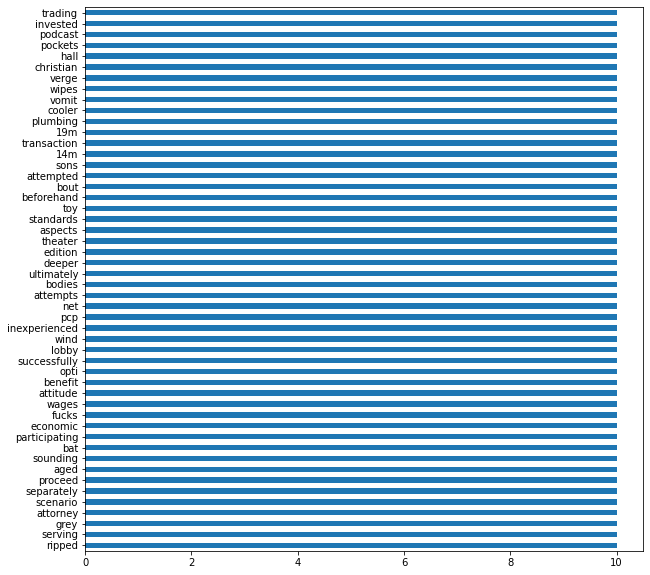

In [10]:
# Setting my figure size
plt.figure(figsize = (10, 10))

# Visualizing the middle words. The top words will be common in both, but the middle may be closer to unique
X_df.sum().sort_values(ascending=False)[4000:4050].plot(kind='barh');

# Pre-Processing

## Imports

In [11]:
# Importing necessary packages for preprocessing
# Using lessons as guide for this portion of my project
import pandas as pd       
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

## Tokenizing
##### When we "tokenize" data, we take it and split it up into distinct chunks based on some pattern.

In [12]:
# Setting a column Tokenized and applying sent_tokenize by row
merged_df['tokenized'] = merged_df.apply(lambda row: sent_tokenize(row['user_post'].lower()), axis=1)

In [13]:
# Visualizing my merged_df with tokenized
merged_df

,title,selftext,user_post,subreddit,tokenized
0,They say that at least one person has a crush ...,But damn I wish whoever had a crush on me woul...,They say that at least one person has a crush ...,0,[they say that at least one person has a crush...
1,i need to lose 80 pounds immediately,my ass is 220 pounds and 5’6”. im fucking 15. ...,i need to lose 80 pounds immediately my ass is...,0,[i need to lose 80 pounds immediately my ass i...
2,i wanna drink hydrochloric acid,​​​​​ ​​​​​​ ​​​​​​ ​​​​​​​​ ​​​​​​​​​​​​​​​​​...,i wanna drink hydrochloric acid ​​​​​ ​​​​​​ ​...,0,[i wanna drink hydrochloric acid ​​​​​ ​​​​​​ ...
3,Ask me weirdly personal questions part 3 (seri...,"Idk why I'm doing this, I guess it's fun and l...",Ask me weirdly personal questions part 3 (seri...,0,[ask me weirdly personal questions part 3 (ser...
4,"Dear teen boys,",If a girl you have a crush on says she's not i...,"Dear teen boys, If a girl you have a crush on ...",0,"[dear teen boys, if a girl you have a crush on..."
...,...,...,...,...,...
7476,How to get a car without any help from family,"I live in California, and have realized all th...",How to get a car without any help from family ...,1,[how to get a car without any help from family...
7477,Has anyone tried HelloFresh or any other food ...,I'm starting to get into cooking but I'm kind ...,Has anyone tried HelloFresh or any other food ...,1,[has anyone tried hellofresh or any other food...
7478,Move and find a job or find a job and move first?,"Hi all, so I've been looking to move recently...",Move and find a job or find a job and move fir...,1,[move and find a job or find a job and move fi...
7479,How to convince South Asian parents that I nee...,"Hey guys,\n\nSo i’m a 26 year old (M) with a s...",How to convince South Asian parents that I nee...,1,[how to convince south asian parents that i ne...


In [14]:
# Using .apply to sent_tokenize my user_post rows individually
merged_df.apply(lambda row: sent_tokenize(row['user_post'].lower()), axis=1)

0       [they say that at least one person has a crush...
1       [i need to lose 80 pounds immediately my ass i...
2       [i wanna drink hydrochloric acid ​​​​​ ​​​​​​ ...
3       [ask me weirdly personal questions part 3 (ser...
4       [dear teen boys, if a girl you have a crush on...
                              ...                        
7476    [how to get a car without any help from family...
7477    [has anyone tried hellofresh or any other food...
7478    [move and find a job or find a job and move fi...
7479    [how to convince south asian parents that i ne...
7480    [tell me like i'm 5 - how the hell do washers ...
Length: 7481, dtype: object

In [15]:
# Using .apply to word_tokenize my user_post rows individually
merged_df.apply(lambda row: word_tokenize(row['user_post'].lower()), axis=1)

0       [they, say, that, at, least, one, person, has,...
1       [i, need, to, lose, 80, pounds, immediately, m...
2       [i, wan, na, drink, hydrochloric, acid, ​​​​​,...
3       [ask, me, weirdly, personal, questions, part, ...
4       [dear, teen, boys, ,, if, a, girl, you, have, ...
                              ...                        
7476    [how, to, get, a, car, without, any, help, fro...
7477    [has, anyone, tried, hellofresh, or, any, othe...
7478    [move, and, find, a, job, or, find, a, job, an...
7479    [how, to, convince, south, asian, parents, tha...
7480    [tell, me, like, i, 'm, 5, -, how, the, hell, ...
Length: 7481, dtype: object

In [16]:
# Instantiate Tokenizer.
tokenizer = RegexpTokenizer(r'\w+')

In [17]:
# Returning each word in the user_post column.
spam_tokens = merged_df.apply(lambda row: tokenizer.tokenize(row['user_post'].lower()), axis = 1)
# Visualize my spam_tokens
spam_tokens

0       [they, say, that, at, least, one, person, has,...
1       [i, need, to, lose, 80, pounds, immediately, m...
2                   [i, wanna, drink, hydrochloric, acid]
3       [ask, me, weirdly, personal, questions, part, ...
4       [dear, teen, boys, if, a, girl, you, have, a, ...
                              ...                        
7476    [how, to, get, a, car, without, any, help, fro...
7477    [has, anyone, tried, hellofresh, or, any, othe...
7478    [move, and, find, a, job, or, find, a, job, an...
7479    [how, to, convince, south, asian, parents, tha...
7480    [tell, me, like, i, m, 5, how, the, hell, do, ...
Length: 7481, dtype: object

In [18]:
# Seperating words by spaces, apostrophes, etc.
tokenizer_1 = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
# Visualizing my 3rd row of data that has been tokenized by tokenizer_1
tokenizer_1.tokenize(merged_df['user_post'][3])

['Ask',
 'me',
 'weirdly',
 'personal',
 'questions',
 'part',
 '3',
 '(serious)',
 'Idk',
 'why',
 'I',
 "'m",
 'doing',
 'this',
 ',',
 'I',
 'guess',
 'it',
 "'s",
 'fun',
 'and',
 'liberating',
 'to',
 'be',
 '100',
 '%',
 'honest',
 'or',
 'something',
 ':3']

In [19]:
# Seperating all the words by spaces.
tokenizer_2 = RegexpTokenizer('\s+', gaps = True)
# Visualizing my 3rd row of data that has been tokenized by tokenizer_2
tokenizer_2.tokenize(merged_df['user_post'][3])

['Ask',
 'me',
 'weirdly',
 'personal',
 'questions',
 'part',
 '3',
 '(serious)',
 'Idk',
 'why',
 "I'm",
 'doing',
 'this,',
 'I',
 'guess',
 "it's",
 'fun',
 'and',
 'liberating',
 'to',
 'be',
 '100%',
 'honest',
 'or',
 'something',
 ':3']

In [20]:
# Pulling all of the capitalized words.
tokenizer_3 = RegexpTokenizer('[A-Z]\w+')
# Visualizing my 3rd row of the data that has been tokenzed by tokenizer_3
tokenizer_3.tokenize(merged_df['user_post'][3])

['Ask', 'Idk']

## Lemmatizing & Stemming
##### Lemmatizing and stemming are two forms of shortening words so we can combine similar forms of the same word.
##### When we "lemmatize" data, we take words and attempt to retrn their lemma, or the base/directory form of a word.

In [21]:
# Instantiate lemmatizer.
lemmatizer = WordNetLemmatizer()

In [22]:
#tokens_lem = [lemmatizer.lemmatize(i) for i in spam_tokens]

In [23]:
#list(zip(spam_tokens, tokens_lem))

##### When we "stem" data, we take words and attempt to return a base form of the word.

## Stop Word Removal

In [24]:
# Print English stopwords.
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [25]:
# Remove stopwords from "spam_tokens"
no_stop_words = [token for token in spam_tokens if token not in stopwords.words('english')]

In [26]:
# Checking stopwords
no_stop_words

[['they',
  'say',
  'that',
  'at',
  'least',
  'one',
  'person',
  'has',
  'a',
  'crush',
  'on',
  'you',
  'but',
  'damn',
  'i',
  'wish',
  'whoever',
  'had',
  'a',
  'crush',
  'on',
  'me',
  'would',
  'tell',
  'me',
  'also',
  'what',
  'if',
  'you',
  'don',
  't',
  'have',
  'a',
  'crush',
  'on',
  'anyone',
  'that',
  'leaves',
  'a',
  'crush',
  'vacuum',
  'and',
  'someone',
  'needs',
  'to',
  'have',
  '2',
  'crushes',
  'to',
  'pick',
  'up',
  'the',
  'slack',
  'which',
  'i',
  'think',
  'is',
  'just',
  'being',
  'polyamorous'],
 ['i',
  'need',
  'to',
  'lose',
  '80',
  'pounds',
  'immediately',
  'my',
  'ass',
  'is',
  '220',
  'pounds',
  'and',
  '5',
  '6',
  'im',
  'fucking',
  '15',
  'i',
  'have',
  'a',
  'binge',
  'eating',
  'disorder',
  'which',
  'means',
  'i',
  'have',
  'lost',
  'the',
  'feeling',
  'of',
  'hungry',
  'or',
  'full',
  'because',
  'k',
  'eat',
  'my',
  'feelings',
  'constantly',
  'fuck',
  '

In [27]:
# Saving dataframe as merged_subreddits. Used throughout my project
merged_df.to_csv('./data/merged_subreddits.csv', index=False)